In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Preparation

In [2]:
train_data_dir = "../input/flowerdatasets/flowers/train"
val_data_dir = "../input/flowerdatasets/flowers/val"
test_data_dir = "../input/flowerdatasets/flowers/test"

image_size = 224
BATCH_SIZE = 32

class_subset = sorted(f for f in os.listdir(train_data_dir) if not f.startswith('.'))
print(class_subset)

['daisy', 'dandelion', 'lily', 'orchid', 'rose', 'sunflower', 'tulip']


In [3]:
#central crop
def crop_center_square(image):
    img_height, img_width = image.shape[0:2]
    min_dim = min(img_height, img_width)
    start_x = (img_width // 2) - (min_dim // 2)
    start_y = (img_height // 2) - (min_dim // 2)
    
    img = image[start_y : start_y + min_dim, start_x : start_x + min_dim]
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

# Definte Image Data Generator

In [4]:
train_generator = ImageDataGenerator(rescale=1/255.,
                                     featurewise_center= False,
                                     samplewise_center= False,
                                     featurewise_std_normalization= False,
                                     samplewise_std_normalization=False,
                                     rotation_range= 10,     # 0-180
                                     zca_whitening=False,
                                     zoom_range=0.1,         # Randomly zoom image
                                     width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
                                     height_shift_range=0.2, # randomly shift images vertically (fraction of total height)
                                     horizontal_flip=True,   # randomly flip images
                                     vertical_flip=False,
                                     validation_split=0.0,
                                     preprocessing_function=crop_center_square)

val_generator  = ImageDataGenerator(rescale=1/255.,
                                    preprocessing_function=crop_center_square)

test_generator = ImageDataGenerator(rescale=1/255.,
                                    preprocessing_function=crop_center_square)

# Define Models

In [5]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.resnet_v2 import ResNet101V2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

BATCH_SIZE = 32
image_size = 224
channel = 3
lr = 1e-4

# VGG16

In [6]:
# VGG16
vgg16_base_model = VGG16(weights='imagenet',
                         include_top= False, 
                         input_shape=(image_size, image_size, channel),
                         pooling='avg')

vgg16_base_model.trainable = True

for layer in vgg16_base_model.layers[:-15]:
    layer.trainable=False
    
vgg16_model = Sequential()
vgg16_model.add(vgg16_base_model)
vgg16_model.add(layers.Dense(256,activation='relu'))
vgg16_model.add(layers.Dropout(0.2))
vgg16_model.add(layers.Dense(len(class_subset),activation="softmax"))

vgg16_model.compile(optimizer=optimizers.Adam(learning_rate = lr), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

2022-05-14 04:12:51.277401: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-14 04:12:51.388751: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-14 04:12:51.389640: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-14 04:12:51.390798: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step


# DenseNet121

In [7]:
# DenseNet121
densenet_base_model = DenseNet121(weights='imagenet',
                                  include_top= False, 
                                  input_shape=(image_size, image_size, channel),
                                  pooling='avg')

densenet_base_model.trainable = True

for layer in densenet_base_model.layers[:-15]:
    layer.trainable=False

densenet_model = Sequential()
densenet_model.add(densenet_base_model)
densenet_model.add(layers.Dense(256,activation='relu'))
densenet_model.add(layers.Dropout(0.2))
densenet_model.add(layers.Dense(len(class_subset),activation="softmax"))

densenet_model.compile(optimizer=optimizers.Adam(learning_rate = lr), 
                       loss='categorical_crossentropy', 
                       metrics=['accuracy'])

29097984/29084464 [==============================] - 0s 0us/step


# MobileNetV2

In [8]:
# MobileNetV2
mobilenet_base_model = MobileNetV2(weights='imagenet',
                                   include_top= False, 
                                   input_shape=(image_size, image_size, channel),
                                   pooling='avg')

mobilenet_base_model.trainable = True

for layer in mobilenet_base_model.layers[:-15]:
    layer.trainable=False
    
mobilenet_model = Sequential()
mobilenet_model.add(mobilenet_base_model)
mobilenet_model.add(layers.Dense(256,activation='relu'))
mobilenet_model.add(layers.Dropout(0.2))
mobilenet_model.add(layers.Dense(len(class_subset),activation="softmax"))

mobilenet_model.compile(optimizer=optimizers.Adam(learning_rate = lr), 
                        loss='categorical_crossentropy', 
                        metrics=['accuracy'])

9420800/9406464 [==============================] - 0s 0us/step


# ResNet101v2

In [9]:
# ResNet101v2
resnet101_base_model = ResNet101V2(weights='imagenet',
                                   include_top= False, 
                                   input_shape=(image_size, image_size, channel),
                                   pooling='avg')

resnet101_base_model.trainable = True

for layer in resnet101_base_model.layers[:-15]:
    layer.trainable=False

resnet101_model = Sequential()
resnet101_model.add(resnet101_base_model)
resnet101_model.add(layers.Dense(256,activation='relu'))
resnet101_model.add(layers.Dropout(0.2))
resnet101_model.add(layers.Dense(len(class_subset),activation="softmax"))

resnet101_model.compile(optimizer=optimizers.Adam(learning_rate = lr), 
                        loss='categorical_crossentropy', 
                        metrics=['accuracy'])

171327488/171317808 [==============================] - 2s 0us/step


# InceptionV3

In [10]:
# InceptionV3
inception_base_model = InceptionV3(input_shape = (image_size, image_size, channel), 
                                   include_top = False, 
                                   weights = 'imagenet',
                                   pooling='avg')

inception_base_model.trainable = True

for layer in inception_base_model.layers[:-15]:
    layer.trainable=False
    
inception_model = Sequential()
inception_model.add(inception_base_model)
inception_model.add(layers.Dense(256,activation='relu'))
inception_model.add(layers.Dropout(0.2))
inception_model.add(layers.Dense(len(class_subset),activation="softmax"))

inception_model.compile(optimizer=optimizers.Adam(learning_rate = lr), 
                        loss='categorical_crossentropy', 
                        metrics=['accuracy'])

87924736/87910968 [==============================] - 0s 0us/step


# InceptionResNetV2

In [11]:
# InceptionResNetV2
inceptionresnet_base_model = InceptionResNetV2(input_shape = (image_size, image_size, channel), 
                                               include_top = False, 
                                               weights="imagenet", 
                                               pooling='avg')

inceptionresnet_base_model.trainable = True

for layer in inceptionresnet_base_model.layers[:-15]:
    layer.trainable=False
    
inceptionresnet_model = Sequential()
inceptionresnet_model.add(inceptionresnet_base_model)
inceptionresnet_model.add(layers.Dense(256,activation='relu'))
inceptionresnet_model.add(layers.Dropout(0.2))
inceptionresnet_model.add(layers.Dense(len(class_subset),activation="softmax"))

inceptionresnet_model.compile(optimizer=optimizers.Adam(learning_rate = lr), 
                        loss='categorical_crossentropy', 
                        metrics=['accuracy'])

219070464/219055592 [==============================] - 1s 0us/step


# Define data generators

In [12]:
traingen = train_generator.flow_from_directory(train_data_dir,
                                               target_size=(image_size, image_size),
                                               class_mode='categorical',
                                               classes=class_subset,
                                               subset='training',
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True,
                                               seed=21)

validgen = val_generator.flow_from_directory(val_data_dir,
                                             target_size=(image_size, image_size),
                                             classes=class_subset,
                                             batch_size=BATCH_SIZE,
                                             shuffle=True,
                                             seed=21)

testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(image_size, image_size),
                                             class_mode=None,
                                             classes=class_subset,
                                             batch_size=1,
                                             shuffle=False,
                                             seed=21)

Found 8069 images belonging to 7 classes.
Found 2306 images belonging to 7 classes.
Found 1156 images belonging to 7 classes.


In [13]:
model_dict = {
    "vgg16": vgg16_model,
    "inceptionv3": inception_model,
    "inception_resnet": inceptionresnet_model,
    "densenet121": densenet_model,
    "mobilenetv2": mobilenet_model,
    "resnet101": resnet101_model
}

weightfile_dict = {
    "vgg16" : 'vgg16_model.hdf5',
    "inceptionv3" : 'inceptionv3_model.hdf5',
    "inception_resnet" : 'inception_resnet_model.hdf5',
    "densenet121" : 'densenet121_model.hdf5',
    "mobilenetv2" : 'mobilenetv2_model.hdf5',
    "resnet101"   : 'resnet101_model.hdf5'    
}

historyfile_dict = {
    "vgg16" : 'vgg16_history.csv',
    "inceptionv3" : 'inceptionv3_history.csv',
    "inception_resnet" : 'inception_resnet_history.csv',
    "densenet121" : 'densenet121_history.csv',
    "mobilenetv2" : 'mobilenetv2_history.csv',
    "resnet101"   : 'resnet101_history.csv'    
}

In [14]:
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

# Modeling Training & Evaluation

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import CSVLogger

In [16]:
def show_confusion_matrix(ground_truths, predictions, model_name, class_indices):

    cm  = confusion_matrix(ground_truths, predictions)

    plt.figure()
    plot_confusion_matrix(cm,figsize=(12,8),cmap=plt.cm.Blues)
    plt.xticks(range(len(class_indices)), class_indices.values(), fontsize=16)
    plt.yticks(range(len(class_indices)), class_indices.values(), fontsize=16)
    plt.xlabel('Predicted Label',fontsize=18)
    plt.ylabel('True Label',fontsize=18)
    plt.title("Confusion Matrix for " + model_name, fontsize=18)
    plt.savefig(model_name + "_confusion_matrix.png")
    plt.show()  

In [17]:
def plot_training_graph(history):
    plt.plot(history.epoch, history.history['accuracy'])
    plt.plot(history.epoch, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.legend(['train', 'validation'])
    plt.xlabel('No. of Epochs')
    plt.ylabel('Accuracy')
    plt.figure()

    plt.plot(history.epoch, history.history['loss'])
    plt.plot(history.epoch, history.history['val_loss'])
    plt.title('Model Loss')
    plt.legend(['train', 'validation'])
    plt.xlabel('No. of Epochs')
    plt.ylabel('Loss')
    plt.show()    

### Training VGG16 ###


2022-05-14 04:13:27.573529: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-05-14 04:13:29.881044: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


252/252 [==============================] - 219s 826ms/step - loss: 0.3083 - accuracy: 0.8944 - val_loss: 0.1114 - val_accuracy: 0.9674

Epoch 00001: val_accuracy improved from -inf to 0.96745, saving model to vgg16_model.hdf5
Epoch 2/10
252/252 [==============================] - 148s 586ms/step - loss: 0.1180 - accuracy: 0.9621 - val_loss: 0.0287 - val_accuracy: 0.9922

Epoch 00002: val_accuracy improved from 0.96745 to 0.99219, saving model to vgg16_model.hdf5
Epoch 3/10
252/252 [==============================] - 148s 587ms/step - loss: 0.0718 - accuracy: 0.9771 - val_loss: 0.0825 - val_accuracy: 0.9787

Epoch 00003: val_accuracy did not improve from 0.99219
Epoch 4/10
252/252 [==============================] - 148s 586ms/step - loss: 0.0690 - accuracy: 0.9784 - val_loss: 0.0725 - val_accuracy: 0.9809

Epoch 00004: val_accuracy did not improve from 0.99219
Epoch 5/10
252/252 [==============================] - 148s 587ms/step - loss: 0.0356 - accuracy: 0.9883 - val_loss: 0.0376 - val_a

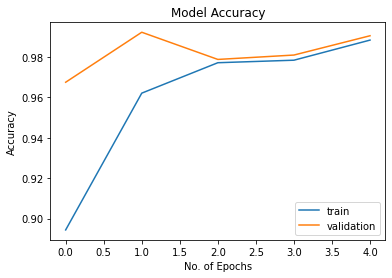

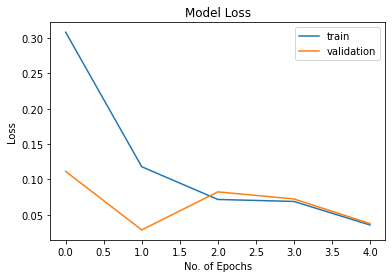

              precision    recall  f1-score   support

       daisy       0.99      0.98      0.99       176
   dandelion       1.00      0.99      1.00       150
        lily       0.98      0.99      0.98       162
      orchid       0.99      0.99      0.99       186
        rose       1.00      0.95      0.97       149
   sunflower       0.99      0.99      0.99       172
       tulip       0.96      1.00      0.98       161

    accuracy                           0.99      1156
   macro avg       0.99      0.99      0.99      1156
weighted avg       0.99      0.99      0.99      1156



<Figure size 432x288 with 0 Axes>

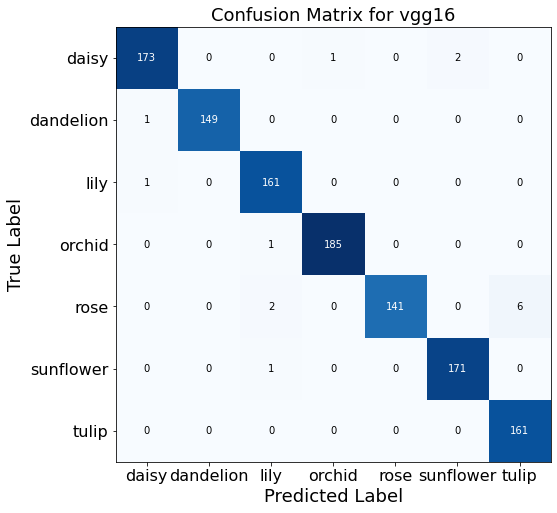

VGG16 model Accuracy: 98.70%


### Training INCEPTIONV3 ###
Epoch 1/10
252/252 [==============================] - 145s 558ms/step - loss: 0.4336 - accuracy: 0.8684 - val_loss: 0.1038 - val_accuracy: 0.9696

Epoch 00001: val_accuracy improved from -inf to 0.96962, saving model to inceptionv3_model.hdf5
Epoch 2/10
252/252 [==============================] - 141s 558ms/step - loss: 0.1318 - accuracy: 0.9607 - val_loss: 0.0602 - val_accuracy: 0.9813

Epoch 00002: val_accuracy improved from 0.96962 to 0.98134, saving model to inceptionv3_model.hdf5
Epoch 3/10
252/252 [==============================] - 141s 561ms/step - loss: 0.0896 - accuracy: 0.9721 - val_loss: 0.0599 - val_accuracy: 0.9809

Epoch 00003: val_accuracy did not improve from 0.98134
Epoch 4/10
252/252 [==============================] - 142s 564ms/step - loss: 0.0739 - accuracy: 0.9772 - val_loss: 0.0513 - val_accuracy: 0.9831

Epoch 00004: val_accuracy improved from 0.98134 to 0.98307, saving model to inceptionv3_model.hdf5
Epo

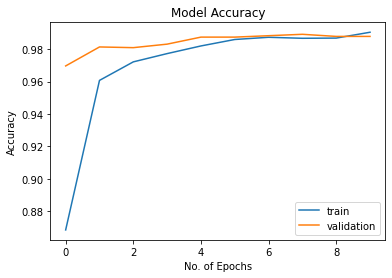

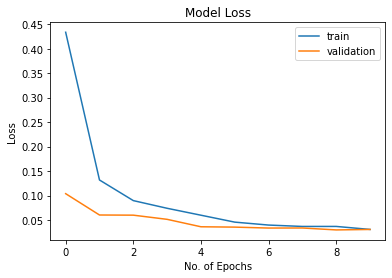

              precision    recall  f1-score   support

       daisy       0.98      0.97      0.97       176
   dandelion       0.99      0.99      0.99       150
        lily       0.99      0.98      0.98       162
      orchid       0.98      0.99      0.99       186
        rose       0.99      0.99      0.99       149
   sunflower       0.96      0.99      0.97       172
       tulip       0.99      0.99      0.99       161

    accuracy                           0.98      1156
   macro avg       0.98      0.98      0.98      1156
weighted avg       0.98      0.98      0.98      1156



<Figure size 432x288 with 0 Axes>

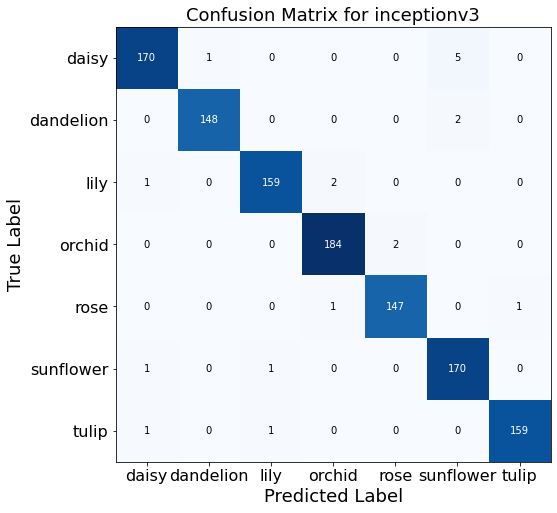

INCEPTIONV3 model Accuracy: 98.36%


### Training INCEPTION_RESNET ###
Epoch 1/10
252/252 [==============================] - 162s 607ms/step - loss: 0.2947 - accuracy: 0.9049 - val_loss: 0.0876 - val_accuracy: 0.9731

Epoch 00001: val_accuracy improved from -inf to 0.97309, saving model to inception_resnet_model.hdf5
Epoch 2/10
252/252 [==============================] - 152s 604ms/step - loss: 0.0907 - accuracy: 0.9711 - val_loss: 0.0739 - val_accuracy: 0.9727

Epoch 00002: val_accuracy did not improve from 0.97309
Epoch 3/10
252/252 [==============================] - 152s 601ms/step - loss: 0.0571 - accuracy: 0.9817 - val_loss: 0.0745 - val_accuracy: 0.9740

Epoch 00003: val_accuracy improved from 0.97309 to 0.97396, saving model to inception_resnet_model.hdf5
Epoch 4/10
252/252 [==============================] - 152s 601ms/step - loss: 0.0583 - accuracy: 0.9808 - val_loss: 0.0464 - val_accuracy: 0.9844

Epoch 00004: val_accuracy improved from 0.97396 to 0.98438, saving model to incep

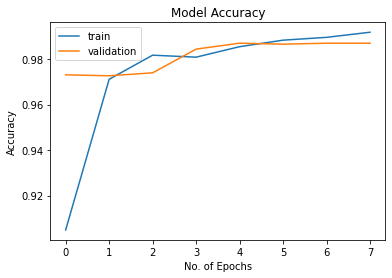

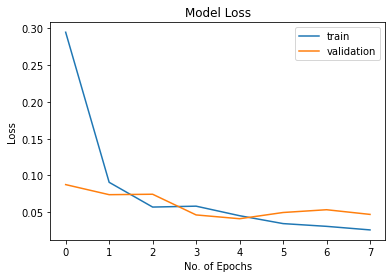

              precision    recall  f1-score   support

       daisy       0.99      0.97      0.98       176
   dandelion       1.00      0.97      0.99       150
        lily       0.98      0.98      0.98       162
      orchid       0.98      0.98      0.98       186
        rose       0.97      0.99      0.98       149
   sunflower       0.96      0.99      0.98       172
       tulip       0.99      0.98      0.98       161

    accuracy                           0.98      1156
   macro avg       0.98      0.98      0.98      1156
weighted avg       0.98      0.98      0.98      1156



<Figure size 432x288 with 0 Axes>

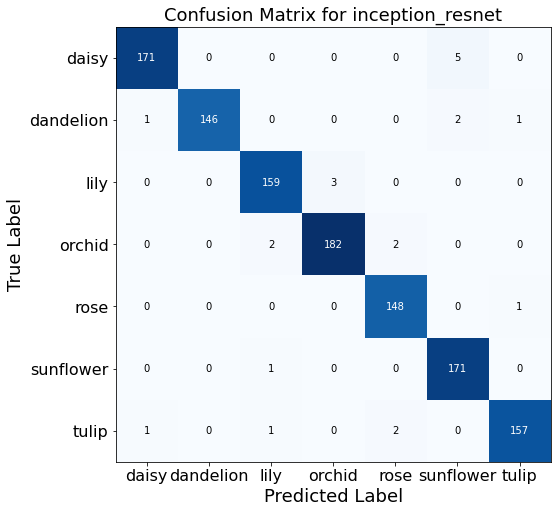

INCEPTION_RESNET model Accuracy: 98.10%


### Training DENSENET121 ###
Epoch 1/10
252/252 [==============================] - 155s 590ms/step - loss: 0.5615 - accuracy: 0.8370 - val_loss: 0.0781 - val_accuracy: 0.9783

Epoch 00001: val_accuracy improved from -inf to 0.97830, saving model to densenet121_model.hdf5
Epoch 2/10
252/252 [==============================] - 146s 581ms/step - loss: 0.1209 - accuracy: 0.9698 - val_loss: 0.0389 - val_accuracy: 0.9865

Epoch 00002: val_accuracy improved from 0.97830 to 0.98655, saving model to densenet121_model.hdf5
Epoch 3/10
252/252 [==============================] - 146s 575ms/step - loss: 0.0758 - accuracy: 0.9798 - val_loss: 0.0230 - val_accuracy: 0.9935

Epoch 00003: val_accuracy improved from 0.98655 to 0.99349, saving model to densenet121_model.hdf5
Epoch 4/10
252/252 [==============================] - 147s 581ms/step - loss: 0.0509 - accuracy: 0.9854 - val_loss: 0.0171 - val_accuracy: 0.9944

Epoch 00004: val_accuracy improved from 0.99349

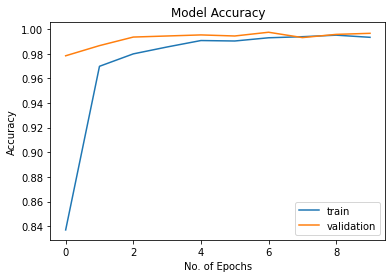

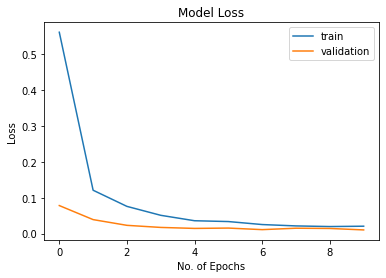

              precision    recall  f1-score   support

       daisy       0.99      0.99      0.99       176
   dandelion       1.00      0.99      0.99       150
        lily       0.99      1.00      1.00       162
      orchid       1.00      1.00      1.00       186
        rose       1.00      0.99      0.99       149
   sunflower       0.99      0.99      0.99       172
       tulip       0.99      1.00      0.99       161

    accuracy                           0.99      1156
   macro avg       0.99      0.99      0.99      1156
weighted avg       0.99      0.99      0.99      1156



<Figure size 432x288 with 0 Axes>

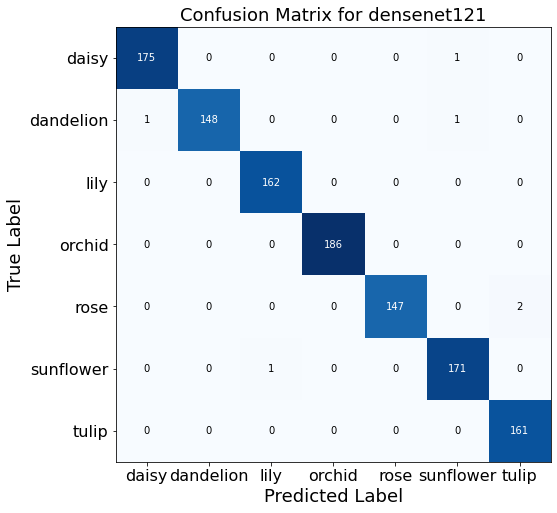

DENSENET121 model Accuracy: 99.48%


### Training MOBILENETV2 ###
Epoch 1/10
252/252 [==============================] - 147s 573ms/step - loss: 0.2745 - accuracy: 0.9140 - val_loss: 0.1038 - val_accuracy: 0.9635

Epoch 00001: val_accuracy improved from -inf to 0.96354, saving model to mobilenetv2_model.hdf5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
252/252 [==============================] - 143s 568ms/step - loss: 0.0629 - accuracy: 0.9823 - val_loss: 0.0878 - val_accuracy: 0.9727

Epoch 00002: val_accuracy improved from 0.96354 to 0.97266, saving model to mobilenetv2_model.hdf5
Epoch 3/10
252/252 [==============================] - 145s 577ms/step - loss: 0.0470 - accuracy: 0.9848 - val_loss: 0.0450 - val_accuracy: 0.9878

Epoch 00003: val_accuracy improved from 0.97266 to 0.98785, saving model to mobilenetv2_model.hdf5
Epoch 4/10
252/252 [==============================] - 145s 577ms/step - loss: 0.0384 - accuracy: 0.9864 - val_loss: 0.0600 - val_accuracy: 0.9870

Epoch 00004: val_accuracy did not improve from 0.98785
Epoch 5/10
252/252 [==============================] - 145s 577ms/step - loss: 0.0296 - accuracy: 0.9909 - val_loss: 0.0642 - val_accuracy: 0.9848

Epoch 00005: val_accuracy did not improve from 0.98785
Epoch 6/10
252/252 [==============================] - 145s 575ms/step - loss: 0.0240 - accuracy: 0.9920 

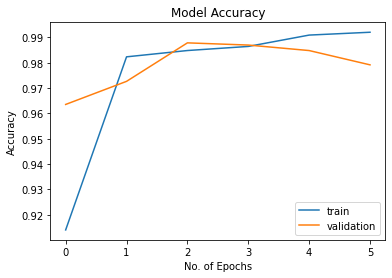

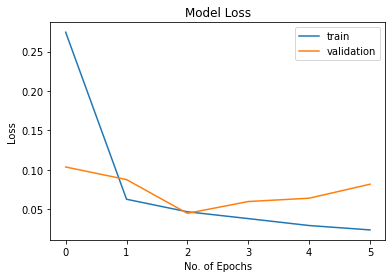

              precision    recall  f1-score   support

       daisy       0.98      0.99      0.99       176
   dandelion       0.99      0.99      0.99       150
        lily       0.98      0.99      0.98       162
      orchid       0.99      0.95      0.97       186
        rose       0.94      0.99      0.97       149
   sunflower       0.98      0.98      0.98       172
       tulip       0.99      0.99      0.99       161

    accuracy                           0.98      1156
   macro avg       0.98      0.98      0.98      1156
weighted avg       0.98      0.98      0.98      1156



<Figure size 432x288 with 0 Axes>

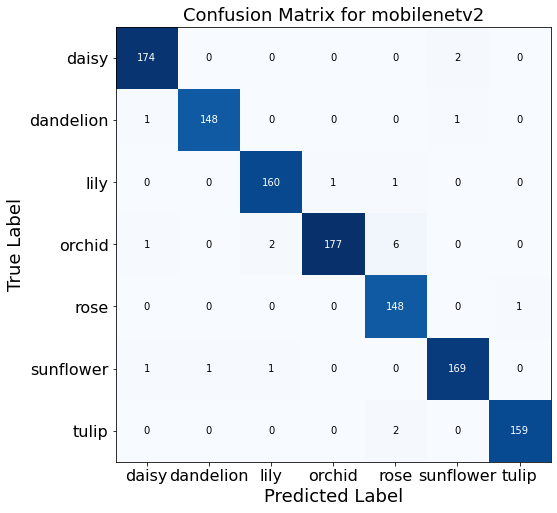

MOBILENETV2 model Accuracy: 98.18%


### Training RESNET101 ###
Epoch 1/10
252/252 [==============================] - 158s 605ms/step - loss: 0.2621 - accuracy: 0.9220 - val_loss: 0.0572 - val_accuracy: 0.9809

Epoch 00001: val_accuracy improved from -inf to 0.98090, saving model to resnet101_model.hdf5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
252/252 [==============================] - 152s 604ms/step - loss: 0.0622 - accuracy: 0.9812 - val_loss: 0.0377 - val_accuracy: 0.9870

Epoch 00002: val_accuracy improved from 0.98090 to 0.98698, saving model to resnet101_model.hdf5
Epoch 3/10
252/252 [==============================] - 152s 604ms/step - loss: 0.0445 - accuracy: 0.9853 - val_loss: 0.0339 - val_accuracy: 0.9913

Epoch 00003: val_accuracy improved from 0.98698 to 0.99132, saving model to resnet101_model.hdf5
Epoch 4/10
252/252 [==============================] - 153s 604ms/step - loss: 0.0312 - accuracy: 0.9909 - val_loss: 0.0332 - val_accuracy: 0.9896

Epoch 00004: val_accuracy did not improve from 0.99132
Epoch 5/10
252/252 [==============================] - 150s 594ms/step - loss: 0.0318 - accuracy: 0.9895 - val_loss: 0.0342 - val_accuracy: 0.9909

Epoch 00005: val_accuracy did not improve from 0.99132
Epoch 6/10
252/252 [==============================] - 152s 604ms/step - loss: 0.0146 - accuracy: 0.9956 - va

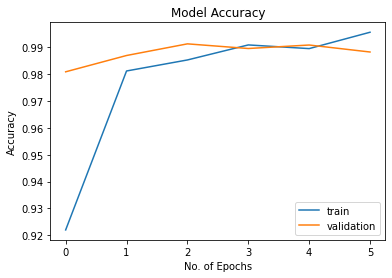

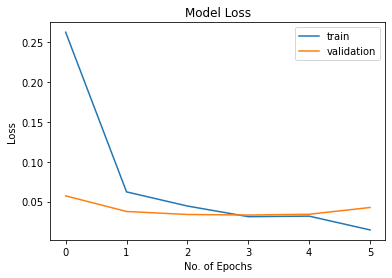

              precision    recall  f1-score   support

       daisy       0.99      0.99      0.99       176
   dandelion       0.98      1.00      0.99       150
        lily       0.98      1.00      0.99       162
      orchid       0.99      0.99      0.99       186
        rose       0.99      0.99      0.99       149
   sunflower       0.99      0.97      0.98       172
       tulip       0.99      0.98      0.98       161

    accuracy                           0.99      1156
   macro avg       0.99      0.99      0.99      1156
weighted avg       0.99      0.99      0.99      1156



<Figure size 432x288 with 0 Axes>

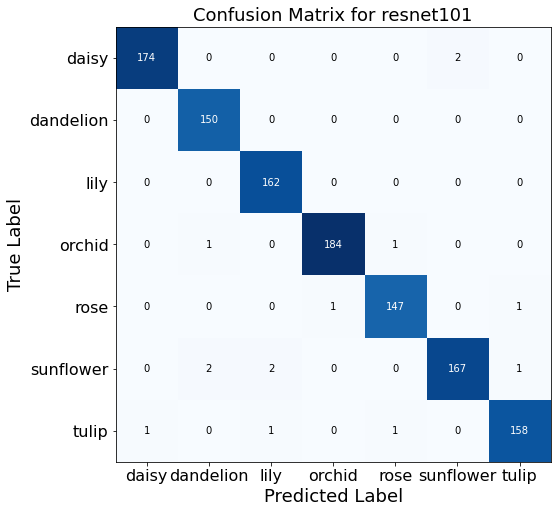

RESNET101 model Accuracy: 98.79%




In [18]:
n_epochs = 10

# Callback Function: EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True, mode='max')

# Callback Function: Reduce learning rate on plateau
red_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, epsilon=0.0001, patience=2, verbose=1)

for key in model_dict:
    print ("### Training {} ###".format(key.upper()))

    model = model_dict[key]

    best_checkpoint = ModelCheckpoint(weightfile_dict[key],
                                      save_weights_only=False, 
                                      save_best_only=True,
                                      monitor='val_accuracy',
                                      mode='max',
                                      verbose=1)

    history_logger = CSVLogger(historyfile_dict[key], separator=",", append=True)

    history = model.fit(traingen,
                        batch_size=BATCH_SIZE,
                        epochs=n_epochs,
                        validation_data=validgen,
                        steps_per_epoch=traingen.samples // BATCH_SIZE,
                        validation_steps=validgen.samples // BATCH_SIZE,
                        callbacks=[best_checkpoint, history_logger, early_stop], #red_lr
                        verbose=1)

    plot_training_graph(history)
    
    ## Model evaluation
    preds = model.predict(testgen)
    preds = np.argmax(preds, axis=1)

    report = classification_report(testgen.classes, preds, target_names=class_indices.values())
    print(report)
    
    with open("classification_reports.txt", "a") as f:
        print("{} CLASSIFICATION REPORT\n".format(key.upper()), file=f)
        print(report, file=f)

    show_confusion_matrix(testgen.classes, preds, key, class_indices)
    
    acc = accuracy_score(testgen.classes, preds)
    with open("model_accuracy.txt", "a") as f:
        print("{} model Accuracy: {:.2f}%".format(key.upper(), acc * 100))
        print("{} model Accuracy: {:.2f}%".format(key.upper(), acc * 100), file=f)

    print("\n")

# Single Image Inference

In [19]:
# from keras.preprocessing.image import load_img
# from tensorflow.keras.models import load_model
# import matplotlib.pyplot as plt

In [20]:
# filename = '../input/flowerdatasets/flowers/test/lily/10007046385_d26421090c_o.jpg'
# image = load_img(filename, target_size=(image_size, image_size))
# plt.imshow(image)
# plt.show()

In [21]:
# import cv2
# import numpy as np
# import time

# image_size = 224 

# img = cv2.imread(filename)
# img = cv2.resize(img,(image_size,image_size))
# img = img/255
# img = np.reshape(img,[1,image_size,image_size,3])

# # model = load_model('vgg16_model.hdf5')
# # # model = load_model('inceptionv3_model.hdf5')
# # # model = load_model('inception_resnet_model.hdf5')
# # # model = load_model('densenet121_model.hdf5')
# # # model = load_model('mobilenetv2_model.hdf5')
# # model = load_model('resnet101_model.hdf5')

# start_time = time.time()
# prediction=model.predict(img) 
# prediction=np.argmax(prediction,axis=1)[0]
# end_time = time.time()

# print("Predicted class: {}, time {:.3f}s".format(class_indices[prediction], end_time-start_time))